In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [75]:
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"

In [86]:
# Зчитайте дані з веб-сторінки
data = pd.read_html(url)[12]  # Читаємо першу таблицю на сторінці

In [90]:
# перші рядки таблиці
print(data.head())

# кількість рядків та стовпців у датафреймі
print("Розмір таблиці:", data.shape)

# значення "—" на значення NaN
data = data.replace("—", pd.NA)

# Визначте типи всіх стовпців
print("Типи стовпців:")
print(data.dtypes)

# типи нечислових колонок на числові
non_numeric_columns = data.columns[2:]
data[non_numeric_columns] = data[non_numeric_columns].apply(pd.to_numeric, errors='coerce')

# частка пропусків міститься в кожній колонці
missing_data_percentage = (data.isnull().sum() / data.shape[0]) * 100
print("Частка пропусків у кожній колонці:")
print(missing_data_percentage)

# Видаліть з таблиці дані по всій країні, останній рядок таблиці
data = data.iloc[:-1]

# Замініть відсутні дані в стовпцях середніми значеннями цих стовпців
data = data.fillna(data.mean())

             Регіон   1950   1960   1970  1990  2000  2012    2014        2019
0              Крим  230.0  206.0  160.0   130    73   126  111.44   80.173913
1         Вінницька  224.0  192.0  142.0   124    84   112  109.00   76.000000
2         Волинська  247.0  250.0  179.0   153   112   148  141.00  101.000000
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111.00   71.000000
4          Донецька  271.0  214.0  140.0   109    61    98   82.00   80.173913
Розмір таблиці: (27, 9)
Типи стовпців:
Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object
Частка пропусків у кожній колонці:
Регіон    0.0
1950      0.0
1960      0.0
1970      0.0
1990      0.0
2000      0.0
2012      0.0
2014      0.0
2019      0.0
dtype: float64


<ipython-input-90-1c4f883f0429>:27: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


Регіони з вищим рівнем народжуваності у 2019 році:
2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object
Регіон з найвищою народжуваністю у 2014 році: Рівненська


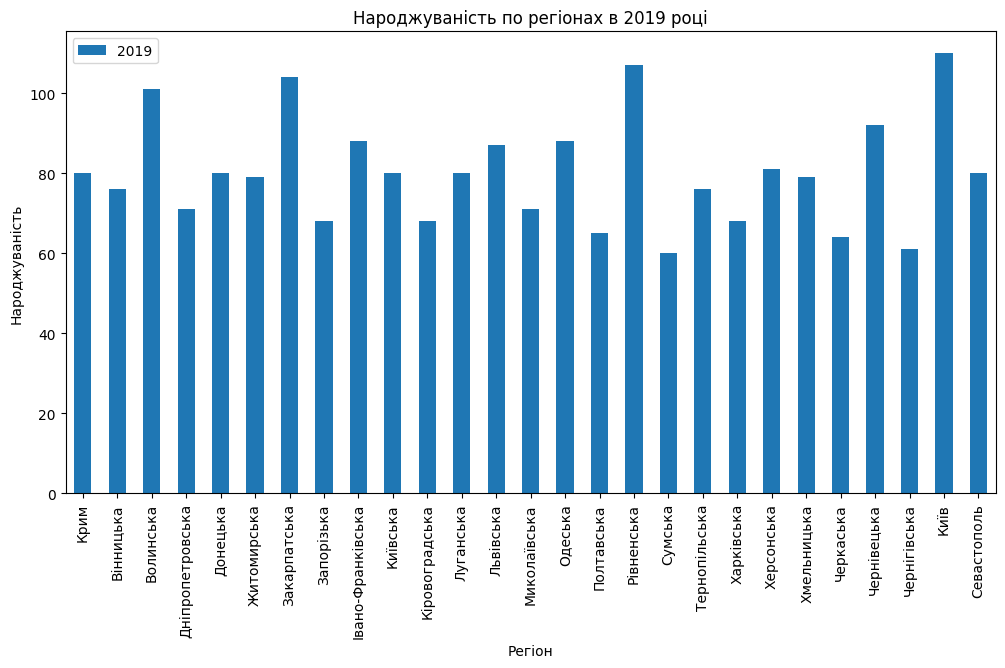

In [89]:
#  список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
regions_higher_than_average_2019 = data[data['2019'] > data['2019'].mean()]['Регіон']
print("Регіони з вищим рівнем народжуваності у 2019 році:")
print(regions_higher_than_average_2019)

# У якому регіоні була найвища народжуваність у 2014 році?
region_with_highest_birthrate_2014 = data[data['2014'] == data['2014'].max()]['Регіон'].values[0]
print("Регіон з найвищою народжуваністю у 2014 році:", region_with_highest_birthrate_2014)

#  стовпчикова діаграма народжуваності по регіонах у 2019 році
import matplotlib.pyplot as plt

data.plot(x='Регіон', y='2019', kind='bar', figsize=(12, 6))
plt.title("Народжуваність по регіонах в 2019 році")
plt.xlabel("Регіон")
plt.ylabel("Народжуваність")
plt.xticks(rotation=90)
plt.show()